#### Question 2: Collecting Industry Development Data for New Energy Electric Vehicles in China, Establishing a Mathematical Model to Describe and Predict the Development of New Energy Electric Vehicles in China Over the Next 10 Years.

In [1]:
import pandas as pd
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_excel('16-22domestic_evsales&charger_monthly.xlsx.xlsx')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head(20)

,EVSales,ChargerNum
Date,,
2016-01-01,10000,32574
2016-02-01,7000,42102
2016-03-01,11400,55652
2016-04-01,13500,61821
2016-05-01,16600,68102
2016-06-01,20000,74445
2016-07-01,24500,80873
2016-08-01,22600,87406
2016-09-01,25700,94064


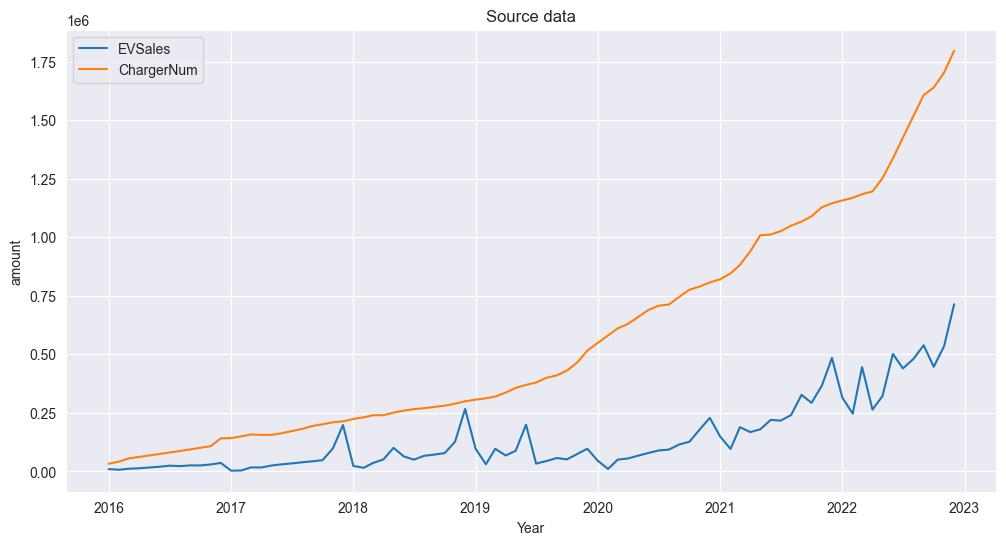

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(data['EVSales'], label='EVSales')
plt.plot(data['ChargerNum'], label='ChargerNum')
plt.legend()
plt.title('Source data')
plt.xlabel('Year')
plt.ylabel('amount')
plt.show()

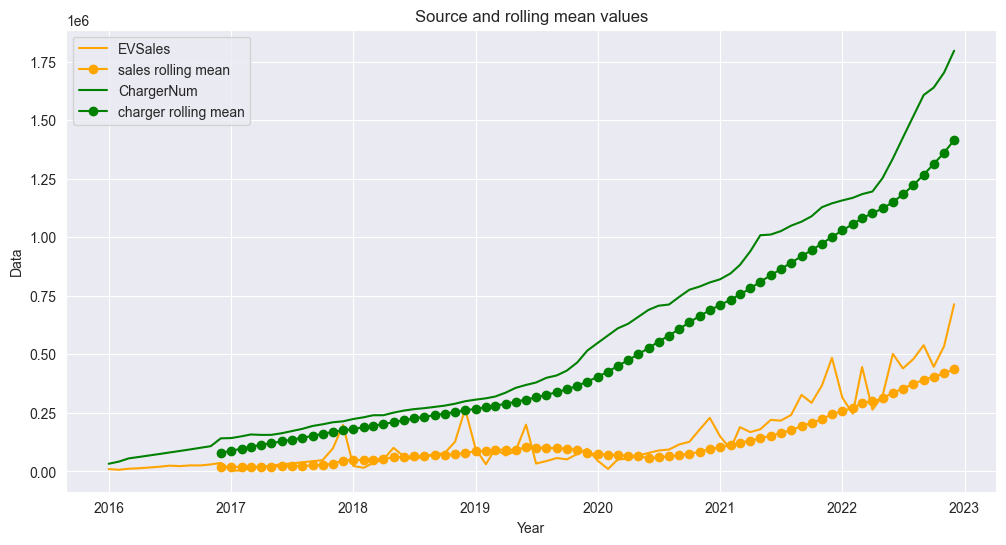

In [4]:
# 滚动均值
sales_rolling_mean = data['EVSales'].rolling(window=12).mean()
charger_rolling_mean = data['ChargerNum'].rolling(window=12).mean()
plt.figure(figsize=(12, 6))
plt.plot(data['EVSales'], label='EVSales', color = 'orange')
plt.plot(sales_rolling_mean, label='sales rolling mean', color = 'orange', marker = 'o')
plt.plot(data['ChargerNum'], label='ChargerNum', color = 'g')
plt.plot(charger_rolling_mean, label='charger rolling mean', color = 'g', marker = 'o')
plt.legend()
plt.title('Source and rolling mean values')
plt.xlabel('Year')
plt.ylabel('Data')
plt.legend()
plt.show()

In [52]:
# sales model auto_arima
sales_model = auto_arima(data['EVSales'], seasonal=True, m=12, suppress_warnings=True, stepwise=True,
                   information_criterion='aic', max_order=None)

charger_model = auto_arima(data['ChargerNum'], seasonal=False, suppress_warnings=True, stepwise=True,
                   information_criterion='aic', max_order=None)

future_dates = pd.date_range(start="2022-12-01", end="2033-01-01", freq='M')

sales_forecast, sales_conf_int = sales_model.predict(n_periods=len(future_dates), return_conf_int=True)
charger_forecast, charger_conf_int = charger_model.predict(n_periods=len(future_dates), return_conf_int=True)

forecast_df = pd.DataFrame({
    'Date': future_dates[:122],
    'EVSales_forecast': sales_forecast,
    'EVSales_lower': sales_conf_int[:, 0],
    'EVSales_upper': sales_conf_int[:, 1],
    'ChargerNum_forecast': charger_forecast,
    'ChargerNum_lower': charger_conf_int[:, 0],
    'ChargerNum_upper': charger_conf_int[:, 1],
})

In [53]:
print(forecast_df)

                 Date  EVSales_forecast  EVSales_lower  EVSales_upper  \
2023-01-01 2022-12-31      5.070138e+05  407717.992480   6.063095e+05   
2023-02-01 2023-01-31      4.479333e+05  339947.702806   5.559189e+05   
2023-03-01 2023-02-28      6.355777e+05  523953.746396   7.472017e+05   
2023-04-01 2023-03-31      4.774250e+05  349184.170866   6.056658e+05   
2023-05-01 2023-04-30      5.237239e+05  386139.091610   6.613088e+05   
...               ...               ...            ...            ...   
2032-09-01 2032-08-31      1.951283e+06  -66082.877377   3.968649e+06   
2032-10-01 2032-09-30      1.903643e+06 -133853.619248   3.941139e+06   
2032-11-01 2032-10-31      1.970422e+06  -87009.420723   4.027854e+06   
2032-12-01 2032-11-30      2.095317e+06   18240.272081   4.172394e+06   
2033-01-01 2032-12-31      1.939945e+06 -164095.911205   4.043985e+06   

            ChargerNum_forecast  ChargerNum_lower  ChargerNum_upper  
2023-01-01         1.877769e+06      1.847914e+06    

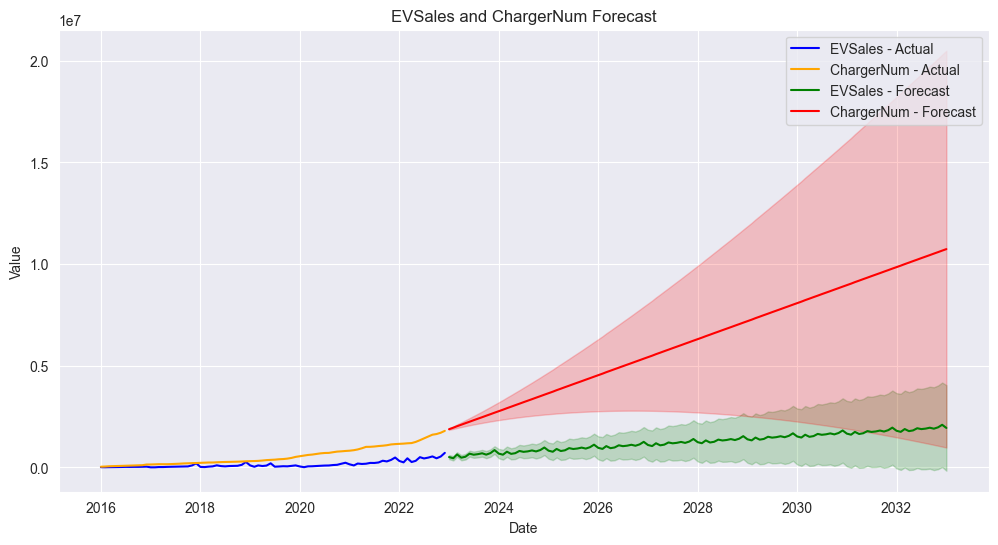

In [54]:

def plot_forcast():
    plt.figure(figsize=(12, 6))

    plt.plot(data['EVSales'], label='EVSales - Actual', color='blue')
    plt.plot(data['ChargerNum'], label='ChargerNum - Actual', color='orange')

    plt.plot(forecast_df['EVSales_forecast'], label='EVSales - Forecast', color='green')
    plt.fill_between(forecast_df.index, forecast_df['EVSales_lower'], forecast_df['EVSales_upper'], color='green', alpha=0.2)

    plt.plot(forecast_df['ChargerNum_forecast'], label='ChargerNum - Forecast', color='red')
    plt.fill_between(forecast_df.index, forecast_df['ChargerNum_lower'], forecast_df['ChargerNum_upper'], color='red', alpha=0.2)

    plt.title('EVSales and ChargerNum Forecast')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
plot_forcast()

##### Removing Extraneous Data for December 2022:

Eliminating the surplus data for December 2022, originally intended for assessing the smoothness of connections or abrupt changes in sales figures during graphical representation.

In [55]:
forecast_df.reset_index(drop=True, inplace=True)
start_date = '2022-12-01'
forecast_df = forecast_df[forecast_df['Date'] > start_date]
forecast_df.to_excel('all_data_predict.xlsx')

充电桩预测模型
                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                   84
Model:             SARIMAX(2, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                -865.231
Date:                                 Sat, 25 Nov 2023   AIC                           1740.462
Time:                                         16:24:58   BIC                           1751.775
Sample:                                     01-01-2016   HQIC                          1744.961
                                          - 12-01-2022                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5726      0.105     -5.439      0.000      -0.779

<Figure size 1200x600 with 0 Axes>

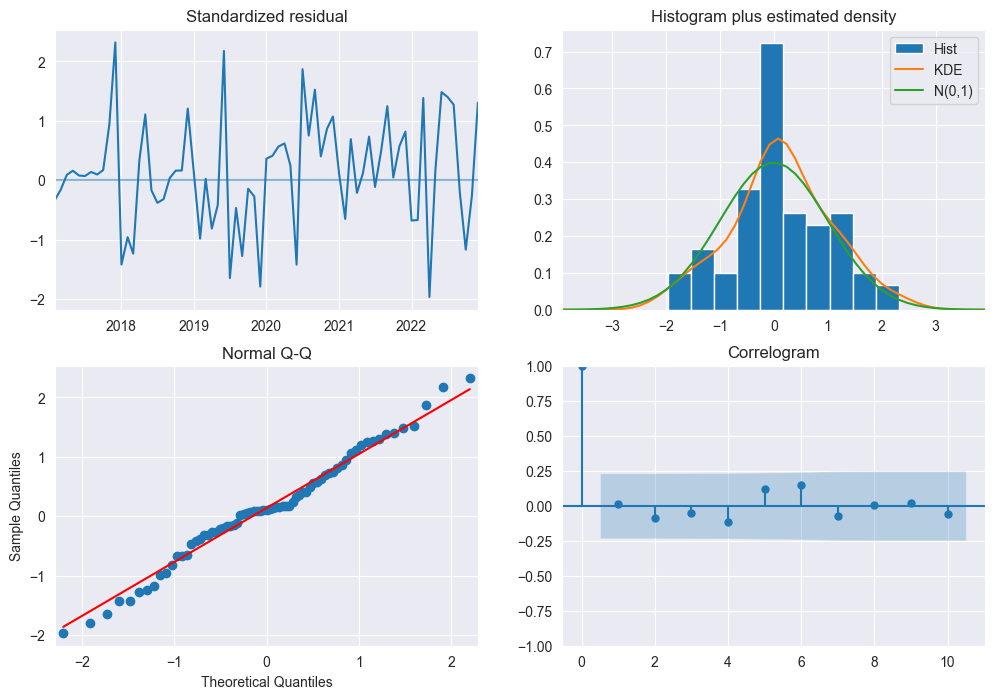

In [56]:
def plot_summary(model):
    print(f'forcast_model\n{model.summary()}')
    plt.figure(figsize=(12, 6))
    model.plot_diagnostics(figsize=(12, 8))
    plt.show()
plot_summary(sales_model)

充电桩预测模型
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -902.442
Date:                Sat, 25 Nov 2023   AIC                           1810.885
Time:                        16:25:04   BIC                           1818.105
Sample:                    01-01-2016   HQIC                          1813.784
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2782      0.081     -3.434      0.001      -0.437      -0.119
ma.L2         -0.3103      0.088     -3.522      0.000      -0.483      -0.138
sigma2       2.32e+08   1.19e-10   1.95e+18 

<Figure size 1200x600 with 0 Axes>

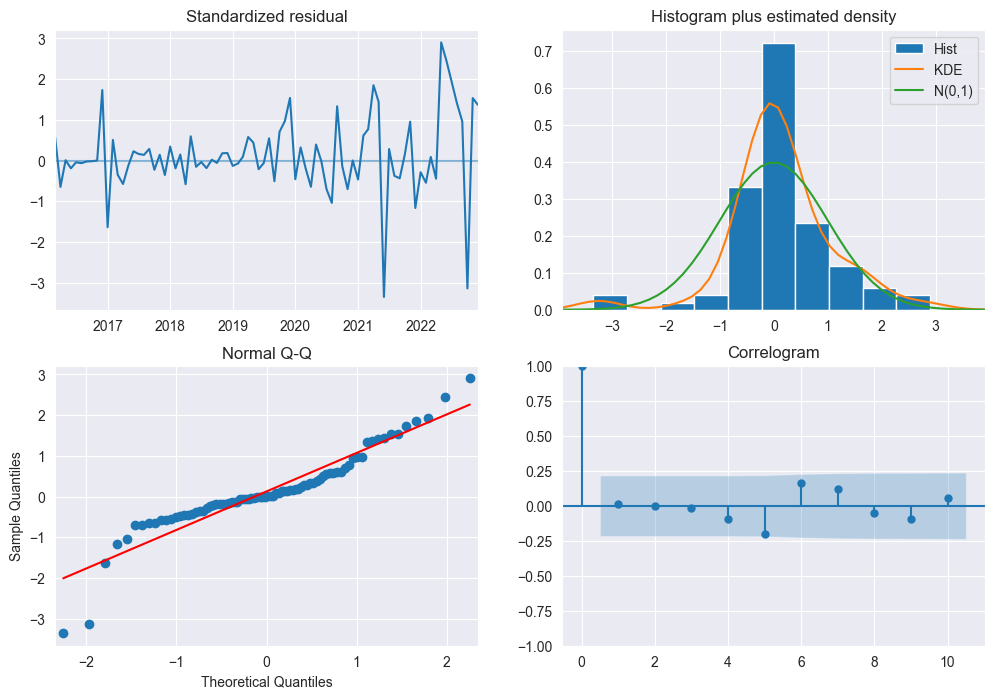

In [57]:
plot_summary(charger_model)

In [58]:
def find_best_order(df, column_name):
    p_values = range(0, 7)  # AR
    d_values = range(0, 3)  # diff
    q_values = range(0, 7)  # MA
    param_combinations = [(p, d, q) for p in p_values for d in d_values for q in q_values]

    best_model = None
    best_aic = np.inf

    tscv = TimeSeriesSplit(n_splits=5)
    df = pd.DataFrame(df)
    for params in param_combinations:
        model = auto_arima(df[column_name], seasonal=False, suppress_warnings=True,
                           stepwise=True, order=(params[0], params[1], params[2]),
                           scoring='mse',  # Use mean squared error for model selection
                           cv=tscv)
        aic = model.aic()

        if aic < best_aic:
            best_model = model
            best_aic = aic

    print(column_name)
    print("Best Model Order (p, d, q):", best_model.order)
    print("Best AIC:", best_aic)
    return best_model.order, best_aic

In [45]:
sales_df = data['EVSales']
charger_df = data['ChargerNum']

In [36]:
sales_best_order, sales_best_aic = find_best_order(sales_df,'EVSales')
charger_best_order, charger_best_aic = find_best_order(charger_df,'ChargerNum')

EVSales
Best Model Order (p, d, q, P, D, Q): (5, 1, 2)
Best AIC: 2053.5910904708476
ChargerNum
Best Model Order (p, d, q, P, D, Q): (0, 2, 2)
Best AIC: 1810.8849529437898


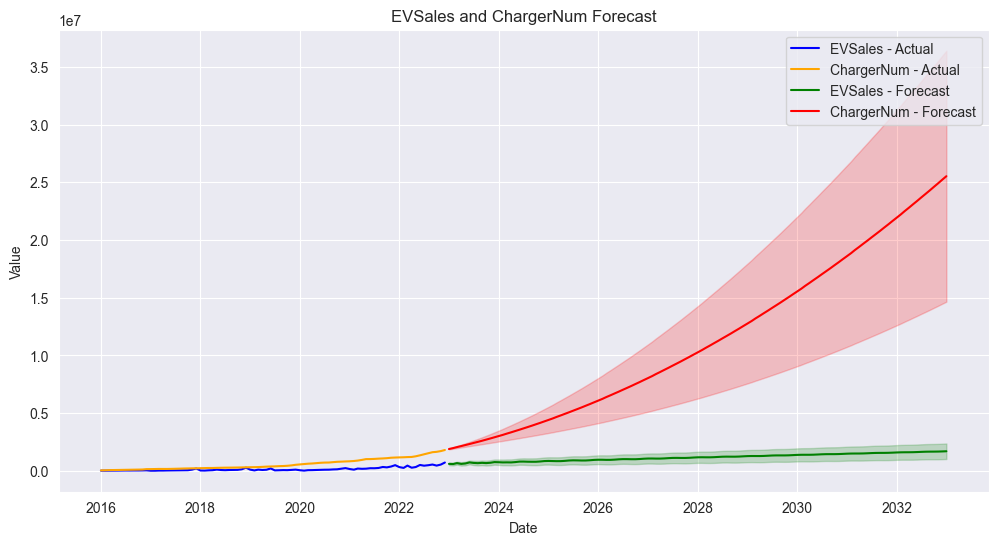

In [59]:
from pmdarima import ARIMA
def get_predict():
    sales_model.fit(sales_df)
    charger_model.fit(charger_df)
    future_dates = pd.date_range(start="2022-12-01", end="2033-01-01", freq='M')

    sales_forecast, sales_conf_int = sales_model.predict(n_periods=len(future_dates), return_conf_int=True)
    charger_forecast, charger_conf_int = charger_model.predict(n_periods=len(future_dates), return_conf_int=True)

    forecast_df = pd.DataFrame({
        'Date': future_dates[:122],
        'EVSales_forecast': sales_forecast,
        'EVSales_lower': sales_conf_int[:, 0],
        'EVSales_upper': sales_conf_int[:, 1],
        'ChargerNum_forecast': charger_forecast,
        'ChargerNum_lower': charger_conf_int[:, 0],
        'ChargerNum_upper': charger_conf_int[:, 1],
    })

    forecast_df.set_index('Date', inplace=True)
    return forecast_df

sales_model = ARIMA(order=sales_best_order, suppress_warnings=True)
charger_model = ARIMA(order=charger_best_order, suppress_warnings=True)
forecast_df = get_predict()
plot_forcast()

充电桩预测模型
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -1017.796
Date:                Sat, 25 Nov 2023   AIC                           2053.591
Time:                        16:25:20   BIC                           2075.361
Sample:                    01-01-2016   HQIC                          2062.337
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.396e+04   8274.771      1.687      0.092   -2257.627    3.02e+04
ar.L1          0.5451      0.158      3.451      0.001       0.236       0.855
ar.L2         -0.9351      0.104     -8.964 

<Figure size 1200x600 with 0 Axes>

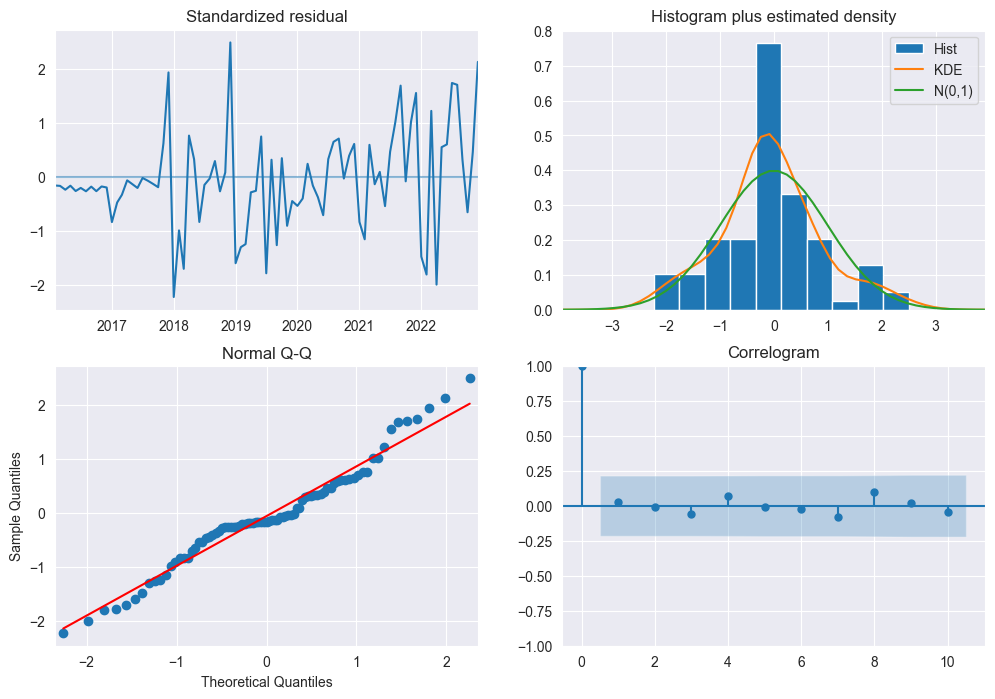

In [60]:
plot_summary(sales_model)

充电桩预测模型
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   84
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -902.870
Date:                Sat, 25 Nov 2023   AIC                           1813.741
Time:                        16:25:26   BIC                           1823.368
Sample:                    01-01-2016   HQIC                          1817.606
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1917.1376    886.008      2.164      0.030     180.594    3653.681
ma.L1         -0.2498      0.101     -2.477      0.013      -0.447      -0.052
ma.L2         -0.2854      0.096     -2.963 

<Figure size 1200x600 with 0 Axes>

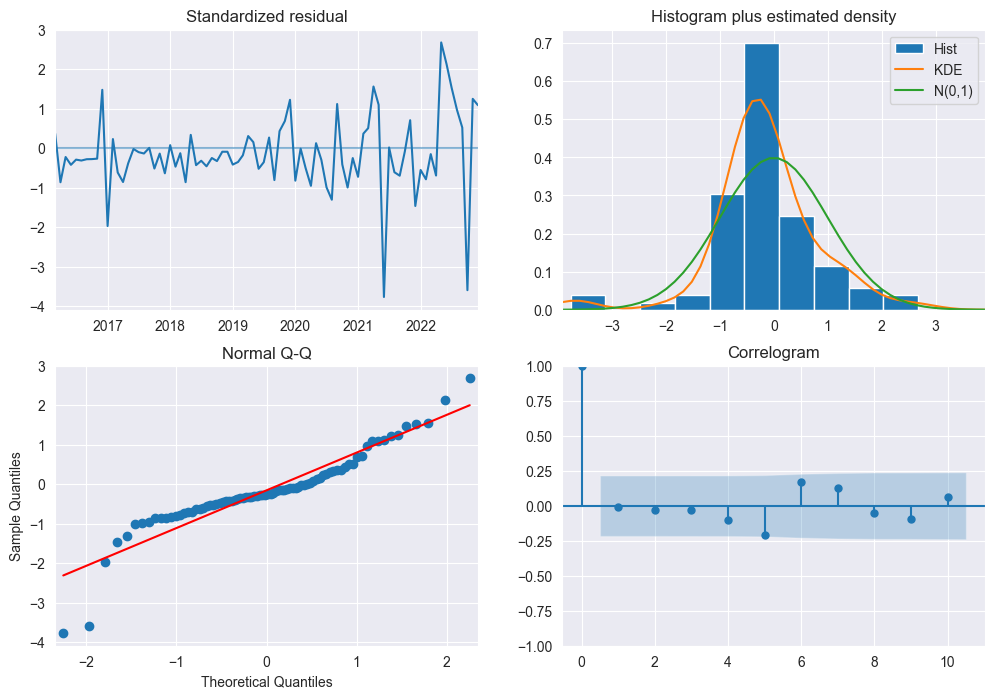

In [61]:
plot_summary(charger_model)

In [13]:
ev_data = pd.read_csv('16-21domestic_ev_yearly_sales.csv')
ev_data.set_index('Year', inplace=True)
print(ev_data)

        Sales
Year         
2010     1000
2011     6000
2012    13000
2013    18000
2014    75000
2015   331000
2016   507000
2017   777000
2018  1256000
2019  1206000
2020  1367000
2021  3521000


Additionally, we have collected annual sales data for new energy electric vehicles in China from 2016 to 2021. Given the relatively limited length of the dataset, it is anticipated that the predictive performance of the current model may be suboptimal. The forthcoming predictions should be considered in light of this as a comparative reference.

In [ ]:
model = auto_arima(ev_data['Sales'], seasonal=False, m=1)
future_years = list(range(2021, 2033))
sales_forecast, sales_conf_int = model.predict(n_periods=12, return_conf_int=True)

forecast_ev_data = pd.DataFrame({
    'Year': future_years,
    'Sales_forecast': sales_forecast,
    'Sales_lower': sales_conf_int[:, 0],
    'Sales_upper': sales_conf_int[:, 1],
})

forecast_ev_data.set_index('Year', inplace=True)
print(forecast_ev_data)

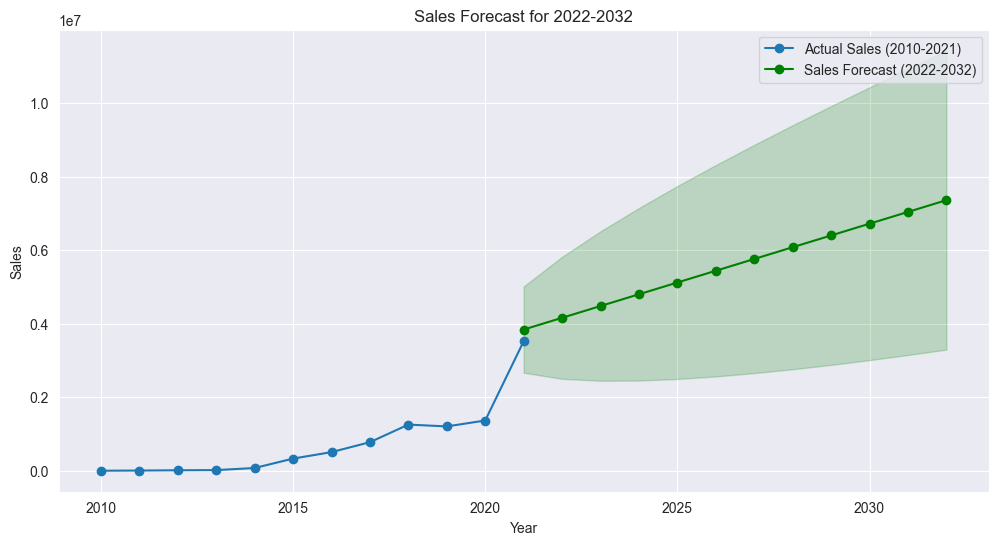

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(ev_data.index, ev_data['Sales'], label='Actual Sales (2010-2021)', marker='o')

plt.plot(forecast_ev_data.index, forecast_ev_data['Sales_forecast'], label='Sales Forecast (2022-2032)', color='green', marker='o')
plt.fill_between(forecast_ev_data.index, forecast_ev_data['Sales_lower'], forecast_ev_data['Sales_upper'], color='green', alpha=0.2)

plt.title('Sales Forecast for 2022-2032')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()